In [41]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/kubig_financial/finrl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ## install required packages
# !pip install gym
# !pip install stockstats
# !pip install gymnasium
# !pip install stable_baselines3
# !pip install alpaca_trade_api
# !pip install exchange_calendars
# !pip install pyfolio
# !pip install matplotlib
# !pip install swig
# !pip install wrds
# !pip install pyportfolioopt
# !pip install --upgrade ipykernel
# ## install finrl library
# !apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import itertools

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
2023-07-03 16:11:15.568858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 16:11:18.859721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/jaxlib/xla_client.py:225: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  float8_e4m3b11fnuz = ml_dtypes.float8_e4m3b11
/usr/local/lib/python3.10/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version clas

In [ ]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

%cd /content/drive/MyDrive/kubig_financial
!ls
import dlinear_module

/content/drive/MyDrive/kubig_financial
dataset				finrl_module.ipynb  results
datasets			finrl_module.py     resultsa2c
Dlinear_module.ipynb		main_test.ipynb     tensorboard_log
dlinear_module.py		prev		    trained_models
finrl				__pycache__	    trials
FINRL_appliciation_fixed.ipynb	result		    yn
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [ ]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TRADE_START_DATE = '2021-10-01'

##### 이녀석만 수정하면 DLINEAR에도 함께 수정됨 #####
TRADE_END_DATE = '2023-05-05'

In [ ]:
tickers = ['XLB','XLE','XLF','XLI','XLK','XLP','XLU','XLV','XLY']
TRAIN_START_DATE = '2009-01-01'
TRADE_END_DATE = '2023-05-05'

df = YahooDownloader(start_date = TRAIN_START_DATE, end_date = TRADE_END_DATE, ticker_list = tickers).fetch_data()

FORCAST_SIZE = 30
epochs = 200
tolerance = 0.0001

prediction_5,prediction_10,prediction_30 = dlinear_module.main(FORCAST_SIZE, epochs, tolerance, TRADE_END_DATE, df=df, tickers=tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (32481, 8)
prediction_start_index 252
test_start_index 3209
3209 652
2927 370 3327
test_loader 12
torch.Size([32, 252, 9])
252
30


100%|██████████| 12/12 [00:00<00:00, 116.15it/s]


Test Loss: 826.522766
torch.Size([370, 30, 9])


100%|██████████| 104/104 [00:00<00:00, 108.65it/s]


Test Loss: 1012.324707
torch.Size([3327, 30, 9])
end


In [ ]:
## 이제 필요없음
# prediction_5 = pd.read_csv('/content/drive/MyDrive/kubig_financial/dataset/prediction_5.csv').set_index('Unnamed: 0')
# prediction_10 = pd.read_csv('/content/drive/MyDrive/kubig_financial/dataset/prediction_10.csv').set_index('Unnamed: 0')
# prediction_30 = pd.read_csv('/content/drive/MyDrive/kubig_financial/dataset/prediction_30.csv').set_index('Unnamed: 0')

In [ ]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3608, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
processed

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,22.900000,23.709999,22.690001,17.207552,7110000,XLB,4,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,17.207552,17.207552,39.189999,0.000000
1,2009-01-02,48.200001,50.669998,48.080002,31.549147,34283700,XLE,4,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,31.549147,31.549147,39.189999,0.000000
2,2009-01-02,10.178716,10.406174,9.918765,7.878147,117919090,XLF,4,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,7.878147,7.878147,39.189999,0.000000
3,2009-01-02,23.520000,24.420000,23.270000,18.167883,6659500,XLI,4,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,18.167883,18.167883,39.189999,0.000000
4,2009-01-02,15.500000,16.070000,15.380000,12.912433,4479800,XLK,4,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,12.912433,12.912433,39.189999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32467,2023-05-03,149.690002,150.660004,148.179993,147.940125,5815100,XLK,2,1.101265,151.344400,144.908068,55.182961,46.442993,14.070898,147.699630,143.517544,18.340000,4.219998
32468,2023-05-03,77.059998,77.379997,76.639999,76.119987,11656600,XLP,2,0.875702,77.189108,74.079747,58.998054,93.547472,16.742852,74.795711,73.269686,18.340000,4.219998
32469,2023-05-03,68.639999,69.050003,67.989998,67.526855,11857200,XLU,2,0.319781,69.807814,67.590043,50.161291,8.126302,5.087511,67.692193,66.656867,18.340000,4.219998
32470,2023-05-03,134.259995,134.899994,133.270004,132.912888,8961500,XLV,2,0.915705,134.927106,131.520086,53.906948,54.096702,4.839950,131.318106,129.596837,18.340000,4.219998


In [ ]:
processed.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,22.900000,23.709999,22.690001,17.207552,7110000,XLB,4,0.0,17.277412,17.174188,100.0,66.666667,100.0,17.207552,17.207552,39.189999,0.0
1,2009-01-02,48.200001,50.669998,48.080002,31.549147,34283700,XLE,4,0.0,17.277412,17.174188,100.0,66.666667,100.0,31.549147,31.549147,39.189999,0.0
2,2009-01-02,10.178716,10.406174,9.918765,7.878147,117919090,XLF,4,0.0,17.277412,17.174188,100.0,66.666667,100.0,7.878147,7.878147,39.189999,0.0
3,2009-01-02,23.520000,24.420000,23.270000,18.167883,6659500,XLI,4,0.0,17.277412,17.174188,100.0,66.666667,100.0,18.167883,18.167883,39.189999,0.0
4,2009-01-02,15.500000,16.070000,15.380000,12.912433,4479800,XLK,4,0.0,17.277412,17.174188,100.0,66.666667,100.0,12.912433,12.912433,39.189999,0.0


In [ ]:
list_ticker = processed["tic"].unique().tolist() #ticker 리스트 불러오기
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str)) #전체 데이터 날짜 날짜 리스트
combination = list(itertools.product(list_date,list_ticker)) #date, ticker 의 combination

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left") #date, tic combination 기준으로 우측에 해당되는 정보들 정리
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)
processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,XLB,22.900000,23.709999,22.690001,17.207552,7110000.0,4.0,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,17.207552,17.207552,39.189999,0.000000
1,2009-01-02,XLE,48.200001,50.669998,48.080002,31.549147,34283700.0,4.0,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,31.549147,31.549147,39.189999,0.000000
2,2009-01-02,XLF,10.178716,10.406174,9.918765,7.878147,117919090.0,4.0,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,7.878147,7.878147,39.189999,0.000000
3,2009-01-02,XLI,23.520000,24.420000,23.270000,18.167883,6659500.0,4.0,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,18.167883,18.167883,39.189999,0.000000
4,2009-01-02,XLK,15.500000,16.070000,15.380000,12.912433,4479800.0,4.0,0.000000,17.277412,17.174188,100.000000,66.666667,100.000000,12.912433,12.912433,39.189999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47110,2023-05-03,XLK,149.690002,150.660004,148.179993,147.940125,5815100.0,2.0,1.101265,151.344400,144.908068,55.182961,46.442993,14.070898,147.699630,143.517544,18.340000,4.219998
47111,2023-05-03,XLP,77.059998,77.379997,76.639999,76.119987,11656600.0,2.0,0.875702,77.189108,74.079747,58.998054,93.547472,16.742852,74.795711,73.269686,18.340000,4.219998
47112,2023-05-03,XLU,68.639999,69.050003,67.989998,67.526855,11857200.0,2.0,0.319781,69.807814,67.590043,50.161291,8.126302,5.087511,67.692193,66.656867,18.340000,4.219998
47113,2023-05-03,XLV,134.259995,134.899994,133.270004,132.912888,8961500.0,2.0,0.915705,134.927106,131.520086,53.906948,54.096702,4.839950,131.318106,129.596837,18.340000,4.219998


In [ ]:
prediction_5_list = []
for i in range(len(prediction_5)):
    for j in range(len(tickers)):
        prediction_5_list.append(prediction_5.iloc[i,j])

for i in range((len(processed_full)-len(prediction_5_list))//len(tickers)):
    for j in range(len(tickers)):
        prediction_5_list.append(prediction_5.iloc[-1,j])

prediction_10_list = []
for i in range(len(prediction_10)):
    for j in range(len(tickers)):
        prediction_10_list.append(prediction_10.iloc[i,j])

for i in range((len(processed_full)-len(prediction_10_list))//len(tickers)):
    for j in range(len(tickers)):
        prediction_10_list.append(prediction_10.iloc[-1,j])

prediction_30_list = []
for i in range(len(prediction_30)):
    for j in range(len(tickers)):
        prediction_30_list.append(prediction_30.iloc[i,j])
for i in range((len(processed_full)-len(prediction_30_list))//len(tickers)):
    for j in range(len(tickers)):
        prediction_30_list.append(prediction_30.iloc[-1,j])

print(len(prediction_5_list))

32472


In [ ]:
processed_full['prediction_5']=prediction_5_list
processed_full['prediction_10']=prediction_10_list
processed_full['prediction_30']=prediction_30_list

processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,...,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence,prediction_5,prediction_10,prediction_30
0,2009-01-02,XLB,22.900000,23.709999,22.690001,17.207552,7110000.0,4.0,0.000000,17.277412,...,100.000000,66.666667,100.000000,17.207552,17.207552,39.189999,0.000000,28.044159,20.688461,29.040047
1,2009-01-02,XLE,48.200001,50.669998,48.080002,31.549147,34283700.0,4.0,0.000000,17.277412,...,100.000000,66.666667,100.000000,31.549147,31.549147,39.189999,0.000000,40.500092,40.728008,41.312927
2,2009-01-02,XLF,10.178716,10.406174,9.918765,7.878147,117919090.0,4.0,0.000000,17.277412,...,100.000000,66.666667,100.000000,7.878147,7.878147,39.189999,0.000000,8.717150,8.589133,9.908503
3,2009-01-02,XLI,23.520000,24.420000,23.270000,18.167883,6659500.0,4.0,0.000000,17.277412,...,100.000000,66.666667,100.000000,18.167883,18.167883,39.189999,0.000000,18.413345,29.980284,29.521414
4,2009-01-02,XLK,15.500000,16.070000,15.380000,12.912433,4479800.0,4.0,0.000000,17.277412,...,100.000000,66.666667,100.000000,12.912433,12.912433,39.189999,0.000000,23.736614,26.177454,25.806019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47110,2023-05-03,XLK,149.690002,150.660004,148.179993,147.940125,5815100.0,2.0,1.101265,151.344400,...,55.182961,46.442993,14.070898,147.699630,143.517544,18.340000,4.219998,162.861069,197.491394,227.776642
47111,2023-05-03,XLP,77.059998,77.379997,76.639999,76.119987,11656600.0,2.0,0.875702,77.189108,...,58.998054,93.547472,16.742852,74.795711,73.269686,18.340000,4.219998,81.898079,79.917686,84.404045
47112,2023-05-03,XLU,68.639999,69.050003,67.989998,67.526855,11857200.0,2.0,0.319781,69.807814,...,50.161291,8.126302,5.087511,67.692193,66.656867,18.340000,4.219998,73.608147,71.526680,82.421753
47113,2023-05-03,XLV,134.259995,134.899994,133.270004,132.912888,8961500.0,2.0,0.915705,134.927106,...,53.906948,54.096702,4.839950,131.318106,129.596837,18.340000,4.219998,149.026245,142.828323,185.119949


In [ ]:
INDICATORS += ['prediction_5','prediction_10','prediction_30']

In [ ]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

28881
3591


In [ ]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension #현재 상태를 나타내는 state를 정의. 1+ ticker 개수 x2 + 인디케이터 개수 x ticker개수
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 9, State Space: 118


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 10000,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [ ]:
print(buy_cost_list)
num_stock_shares

[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env = env_train)

if_using_a2c = True ##a2c만 사용해보자
if_using_ddpg = False
if_using_ppo = False
if_using_td3 = False
if_using_sac = False

In [ ]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/a2c


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

--------------------------------------
| time/                 |            |
|    fps                | 153        |
|    iterations         | 100        |
|    time_elapsed       | 3          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -12.8      |
|    explained_variance | 0.192      |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | 14.2       |
|    reward             | 0.11352264 |
|    std                | 1          |
|    value_loss         | 1.4        |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 156        |
|    iterations         | 200        |
|    time_elapsed       | 6          |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -12.8      |
|    explained_variance | -1.71      |
|    learning_rate      |

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])


e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [ ]:
trained_a2c

In [ ]:
trained_model = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_model,
    environment = e_trade_gym)

hit end!


In [ ]:
# model save
path = '/content/drive/MyDrive/kubig_financial/result/trained_a2c_model.pt'
trained_model.save(path)

In [ ]:
!pip install stable-baselines3

In [ ]:
from stable_baselines3 import A2C

In [ ]:
# model load
trained_model = A2C.load(path)
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_model,
    environment = e_trade_gym)

hit end!


In [ ]:
df_account_value_a2c.shape

(399, 2)

In [ ]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_account_value_a2c.to_csv("/content/drive/MyDrive/kubig_financial/result/df_account_value_a2c.csv")
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)
stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_a2c['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
# df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
df_dji.to_csv("/content/drive/MyDrive/kubig_financial/result/df_dji+.csv")

result = pd.DataFrame(df_result_a2c)

"""result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True)
result = pd.merge(result, df_result_td3, left_index=True, right_index=True)
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True)
result = pd.merge(result, df_result_sac, left_index=True, right_index=True)
result = pd.merge(result, MVO_result, left_index=True, right_index=True)"""
result = pd.merge(result, df_dji, left_index=True, right_index=True)


result.columns = ['a2c','dji']

print("result: ", result)
result.to_csv("/content/drive/MyDrive/kubig_financial/result/result.csv")

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (400, 8)
Annual return         -0.022145
Cumulative returns    -0.034921
Annual volatility      0.176822
Sharpe ratio          -0.038668
Calmar ratio          -0.100930
Stability              0.215672
Max drawdown          -0.219408
Omega ratio            0.993578
Sortino ratio         -0.053987
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.003436
Daily value at risk   -0.022305
dtype: float64
result:                       a2c           dji
date                                  
2021-10-01  1.000000e+06  1.000000e+06
2021-10-04  9.917379e+05  9.905746e+05
2021-10-05  9.967442e+05  9.996566e+05
2021-10-06  1.003220e+06  1.002637e+06
2021-10-07  1.011066e+06  1.012483e+06
...                  ...           ...
2023-04-27  1.042043e+06  9.854252e+05
2023-04-28  1.046830e+06  9.933491e+05
2023-05-01  1.044682e+06  9

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


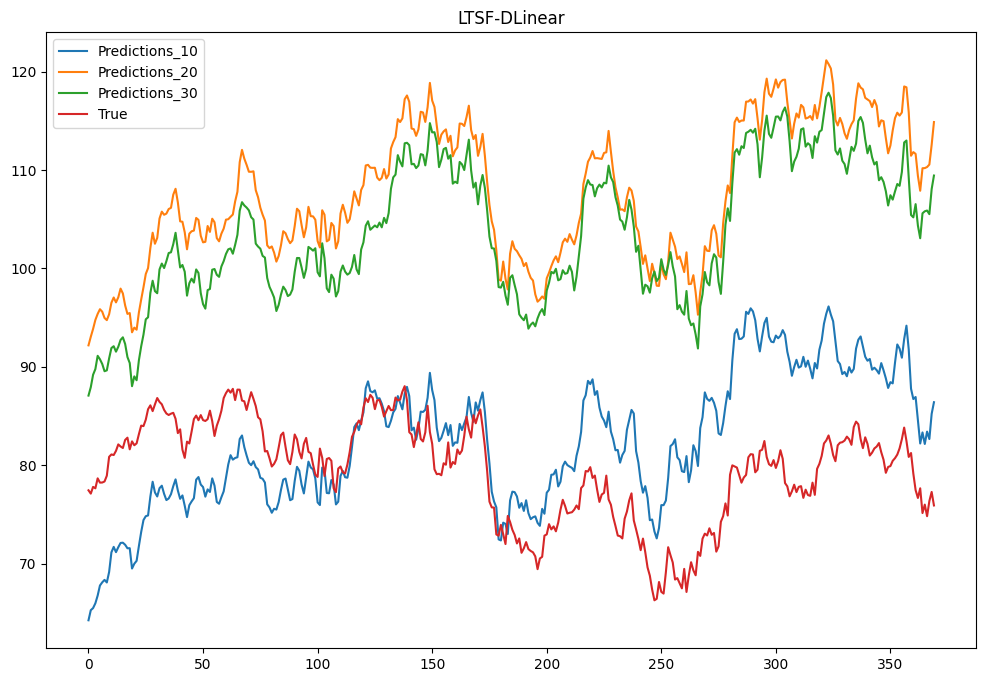

<Figure size 1500x500 with 0 Axes>

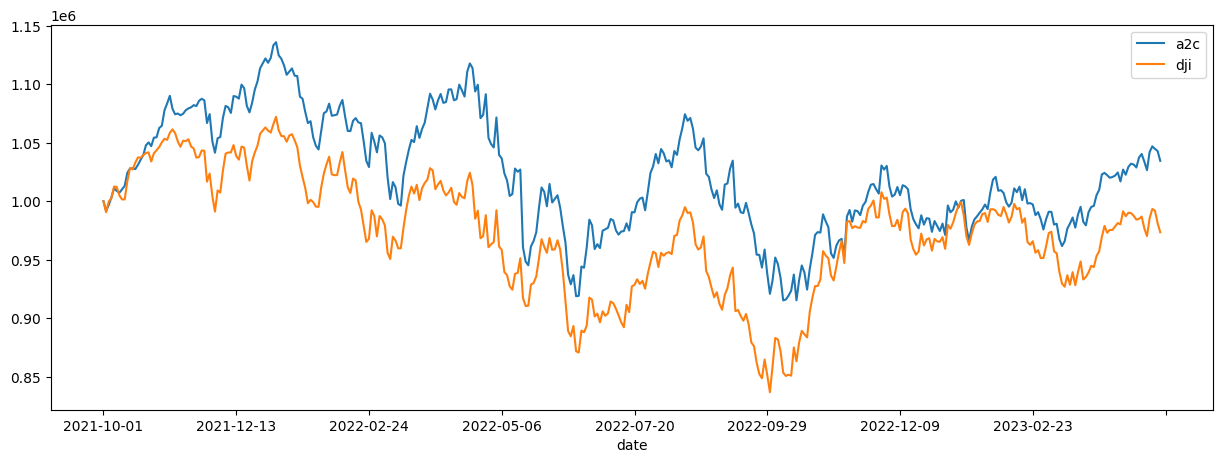

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [ ]:
df_result_a2c.iloc[-1,0]

1034433.8933423769

In [ ]:
print('A2C로 얻은 투자 수익률>>', round((df_result_a2c.iloc[-1,0]/df_result_a2c.iloc[0,0]-1)*100,2),'%')

A2C로 얻은 투자 수익률>> 3.44 %


In [ ]:
df_daily_return = df_account_value_a2c
df_daily_return

,date,account_value
0,2021-10-01,1.000000e+06
1,2021-10-04,9.917379e+05
2,2021-10-05,9.967442e+05
3,2021-10-06,1.003220e+06
4,2021-10-07,1.011066e+06
...,...,...
394,2023-04-27,1.042043e+06
395,2023-04-28,1.046830e+06
396,2023-05-01,1.044682e+06
397,2023-05-02,1.042871e+06


In [ ]:
df_actions_a2c

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,
2021-10-01,0,1,0,0,0,10000,0,2733,0
2021-10-04,0,1,0,0,0,0,0,-695,479
2021-10-05,0,0,0,0,0,0,0,-695,480
2021-10-06,0,0,0,0,0,0,0,-1343,923
2021-10-07,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2023-04-26,0,0,0,0,0,0,0,0,0
2023-04-27,0,0,0,0,0,0,0,0,0
2023-04-28,0,0,0,0,0,0,0,0,0


In [ ]:
unique_trade_date = processed_full[(processed_full.date > TRADE_START_DATE)&(processed_full.date <= TRADE_END_DATE)].date.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('/content/results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    # df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))